ContourMap Library Examples
This notebook demonstrates the usage of the ContourMap class from the essentials.py library.

The ContourMap class is designed to generate contour plots from scattered 2D data (X, Y, and Z values) using different interpolation methods.

## 1. Setup
First, let's import the necessary libraries and the ContourMap class itself. We'll also generate some sample data to work with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# You'll need to have your essentials.py file in the same directory
from PetroMap.essentials import ContourMap
import pandas as pd
data = pd.read_excel("cleaned xy data.xlsx")
X = data.XCOORD
Y = data.YCOORD
Z = data.PAY
well_names = data.ALIAS.to_list()

## 2. Cubic Spline Interpolation with Matplotlib
The default interpolation method for ContourMap is cubic spline interpolation. This is great for creating a smooth, continuous surface. By default, the backend is set to 'matplotlib'.

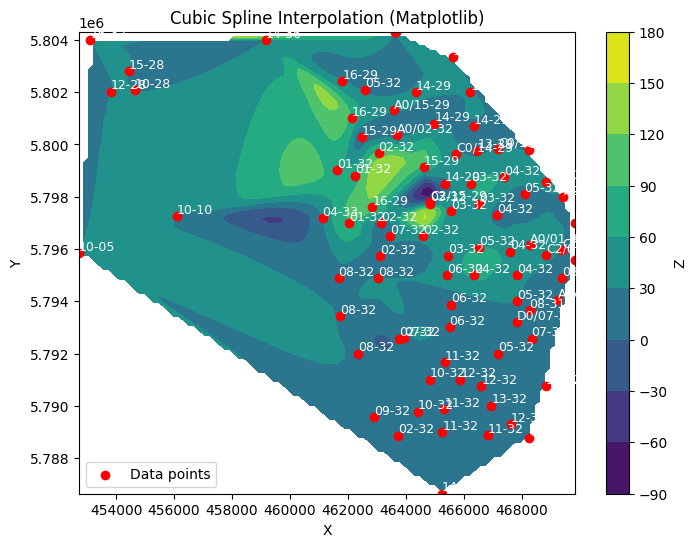

In [2]:
# Create a ContourMap instance for cubic interpolation
contour_cubic_mpl = ContourMap(X, Y, Z, well_names=well_names)

# Plot the map and display it
fig = contour_cubic_mpl.plot_cubicmap(title="Cubic Spline Interpolation (Matplotlib)")
plt.show()

## 3. K-Nearest Neighbors (KNN) Interpolation
The plot_knnmap method uses a machine learning approach (KNN) to interpolate the data. This can be useful for data with sharp discontinuities.

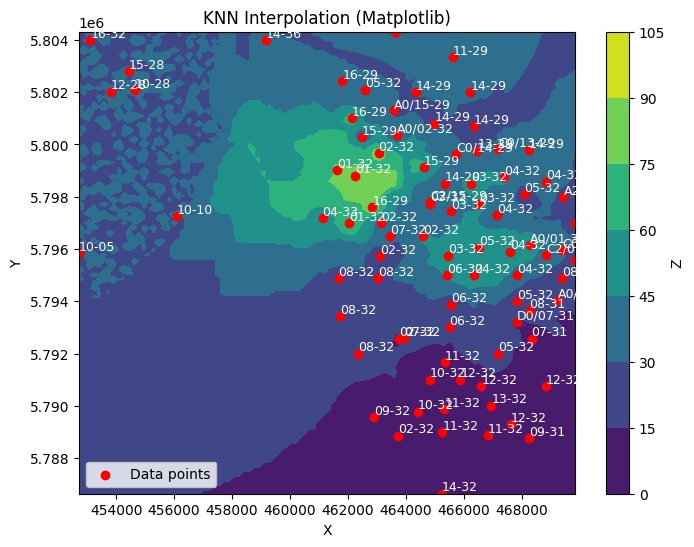

In [3]:
# Create a ContourMap instance for KNN interpolation
contour_knn_mpl = ContourMap(X, Y, Z, well_names=well_names)

# Plot the map using KNN with 5 neighbors
fig = contour_knn_mpl.plot_knnmap(title="KNN Interpolation (Matplotlib)", n_neighbors=5)
plt.show()


## 4. Radial Basis Function (RBF) Interpolation
The plot_rbfmap method provides another powerful interpolation technique. You can specify different functions to control the shape of the surface.

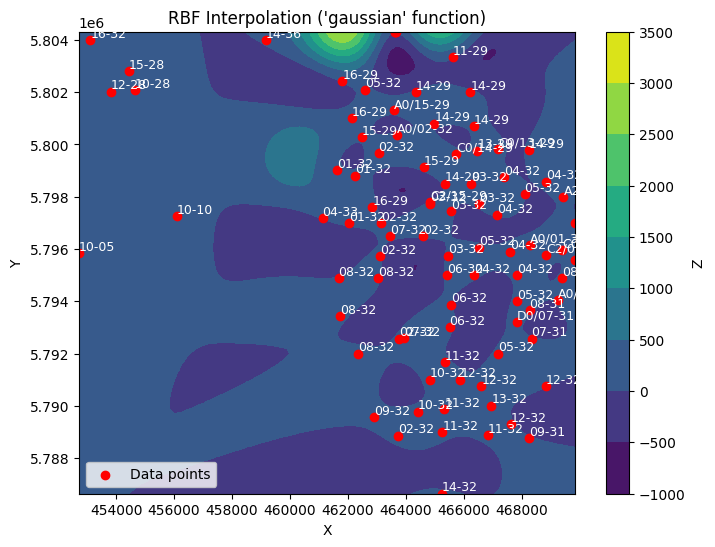

In [4]:
# Create a ContourMap instance for RBF interpolation
contour_rbf_mpl = ContourMap(X, Y, Z, well_names=well_names)

# Plot the map using RBF with the 'gaussian' function
fig = contour_rbf_mpl.plot_rbfmap(title="RBF Interpolation ('gaussian' function)", function='gaussian')
plt.show()


## 5. Using the Plotly Backend
If you have Plotly installed, you can use a more interactive backend for your plots.

In [6]:
# Create a ContourMap instance for cubic interpolation
contour_cubic_mpl = ContourMap(X, Y, Z, well_names=well_names, backend="plotly")

# Plot the map and display it
fig = contour_cubic_mpl.plot_cubicmap(title="Cubic Spline Interpolation (Matplotlib)")
fig.update_layout(height=1000, template="plotly_dark")

## OpportunityContour Library Examples
This notebook provides examples of how to use the OppurtunityContour class from the opportunity.py library.

The OppurtunityContour class is designed for creating "opportunity maps" by combining and normalizing multiple variables into a single composite score. This is especially useful for applications like geoscience, where you might want to identify areas of interest based on a combination of different subsurface properties.

### 1. Setup
We'll start by importing the necessary libraries and the OppurtunityContour class. We'll also create a sample pandas DataFrame that mimics geological data, including variables like PAY (pay thickness), POROSITY, and SW (water saturation).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# You'll need to have your essentials.py file in the same directory
from PetroMap.oppurtunity import OppurtunityContour
import pandas as pd
data = pd.read_excel("cleaned xy data.xlsx")
data = data[ data.XCOORD > 460000 ]
X = data.XCOORD
Y = data.YCOORD
Z = data.PAY
well_names = data.ALIAS.to_list()
# Define custom variables and weights
custom_variables = ["SW",'PAY', 'POROSITY']
custom_weights = [0.2, 0.3, 0.5] # PAY is considered more important

# Create a new OppurtunityContour instance (optional, you can reuse the old one)
opp_map_custom = OppurtunityContour(data, well_names=well_names,backend="plotly")

# Plot the map with custom variables and weights
fig = opp_map_custom.plot_oppurtunity_map(
    variables=custom_variables,
    weights=custom_weights,
    title="Opportunity Map with Custom Weights"
)
fig.update_layout(height=800, width=800)